In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

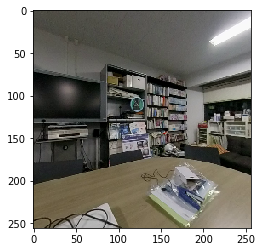

In [2]:
image = "/home/tamaru/scene_categorize/main/data/insta_cube/lab/lab_desk_table/0/lab_desk_table_0_img_000000.png"
bgr = cv2.imread(image)
bgr = cv2.cvtColor(bgr, cv2.COLOR_RGB2BGR)
plt.imshow(bgr)

In [3]:
h, w = bgr.shape[:2]
mask = np.zeros((h,w), dtype = np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect=(1,1,w,h)
cv2.grabCut(bgr, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
bgr2 = bgr*mask2[:,:,np.newaxis]

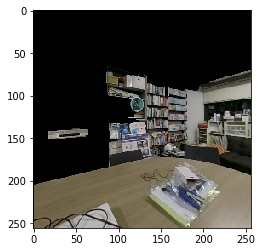

In [4]:
plt.imshow(bgr)
plt.imshow(bgr2)

In [5]:
mix_img_ = pd.read_csv("/home/tamaru/scene_categorize/main/data/mix_img.csv", names=["path", "data", "mix_img"])
mix_img_ = mix_img_.drop(["data", "mix_img"], axis=1)

In [7]:
mix_img_np = np.array(mix_img_)
for row in mix_img_np: 
    print(row[0])
    print(row[0].split("/")[-1])
    img = cv2.imread(row[0])
    mask = np.zeros(img.shape[:2],np.uint8)

    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    rect = (0,0,256,256)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]

    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

    cv2.imwrite("/home/tamaru/scene_categorize/main/data/mask/"+row[0].split("/")[-1],mask)

/home/tamaru/scene_categorize/main/data/mix_img/boy.jpg
boy.jpg
/home/tamaru/scene_categorize/main/data/mix_img/guitar.jpg
guitar.jpg
/home/tamaru/scene_categorize/main/data/mix_img/suitcase.jpg
suitcase.jpg
/home/tamaru/scene_categorize/main/data/mix_img/pizza.jpg
pizza.jpg
/home/tamaru/scene_categorize/main/data/mix_img/hairdryer.jpg
hairdryer.jpg
/home/tamaru/scene_categorize/main/data/mix_img/dice.jpg
dice.jpg
/home/tamaru/scene_categorize/main/data/mix_img/pillow.jpg
pillow.jpg
/home/tamaru/scene_categorize/main/data/mix_img/globe.jpg
globe.jpg
/home/tamaru/scene_categorize/main/data/mix_img/skateboard.jpg
skateboard.jpg
/home/tamaru/scene_categorize/main/data/mix_img/binocular.jpg
binocular.jpg
/home/tamaru/scene_categorize/main/data/mix_img/bag.jpg
bag.jpg
/home/tamaru/scene_categorize/main/data/mix_img/rubiccube.jpg
rubiccube.jpg
